In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [2]:
X = np.random.rand(50, 1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(50,1) #no data in world is perfect



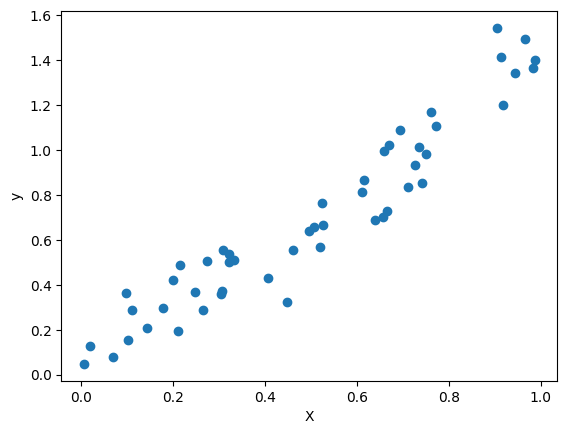

In [3]:
fig=plt.figure()
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

How does linear regression perform on this variable

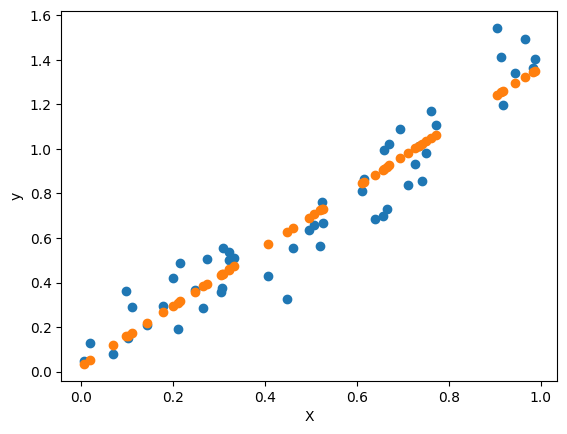

0.9097884301055059

In [4]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)
output=model.predict(X)
fig=plt.figure()
plt.scatter(X,y ,label="smaples")
plt.scatter(X,output,label="predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.show()
display(model.score(X,y))


Polynomial Regression

How does it perform when we add X2 as the feature?

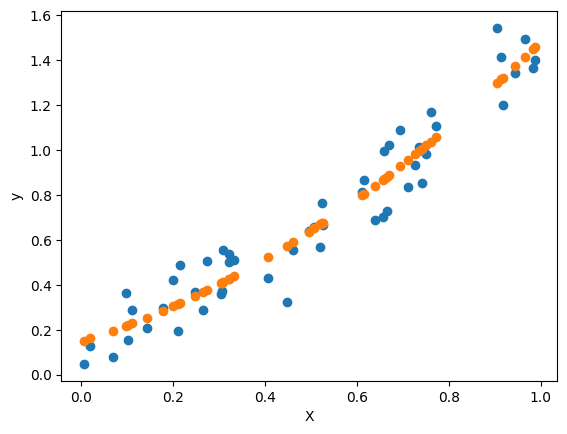

0.926910018937956

In [5]:
from sklearn.preprocessing import StandardScaler

X_deg2 = np.hstack([X, X**2])
model_deg2 = LinearRegression()
model_deg2.fit(X_deg2, y)
output = model_deg2.predict(X_deg2)
fig = plt.figure()
plt.scatter(X,y ,label="smaples")
plt.scatter(X,output,label="predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.show()
display(model_deg2.score(X_deg2,y))

Note: y(x,w) is non-linear functions of x but a linear function of w.

How does it perform when we add X3 as the feature?

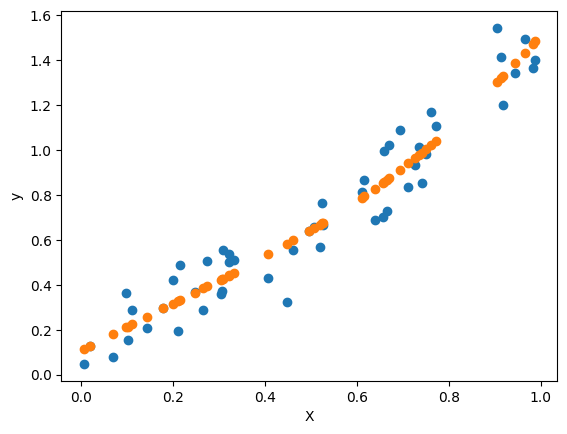

0.9283471500824061

In [6]:
from sklearn.preprocessing import StandardScaler

X_deg3 = np.hstack([X, X**2, X**3])
model_deg3 = LinearRegression()
model_deg3.fit(X_deg3, y)
output = model_deg3.predict(X_deg3)
fig = plt.figure()
plt.scatter(X,y ,label="smaples")
plt.scatter(X,output,label="predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.show()
display(model_deg3.score(X_deg3,y))

Following the trend, it might be tempting to try higher degree polynomial

```SKLearn's Polynomial Features()```

How can we generate "polynomial" features instead of creating polynomial np.hstack([X , X**2 , ..X**n])?

(50, 4)

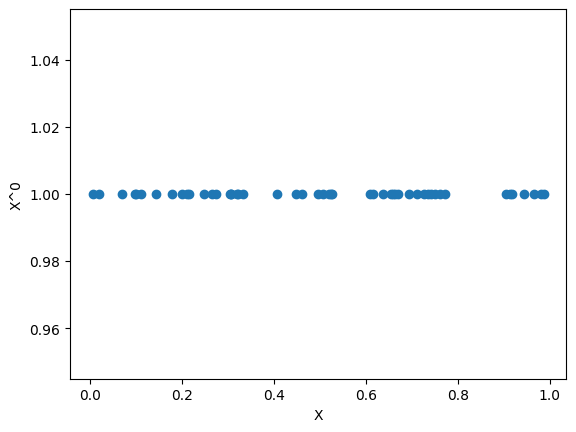

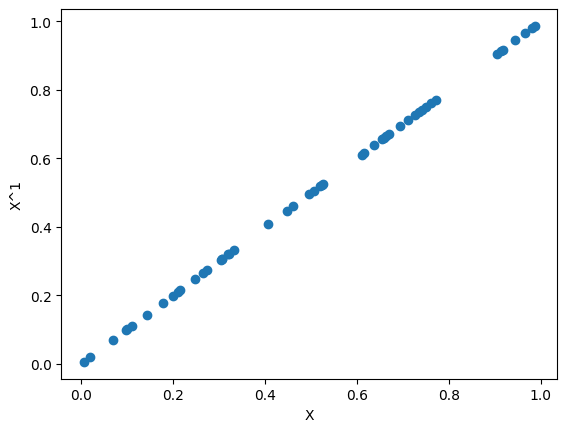

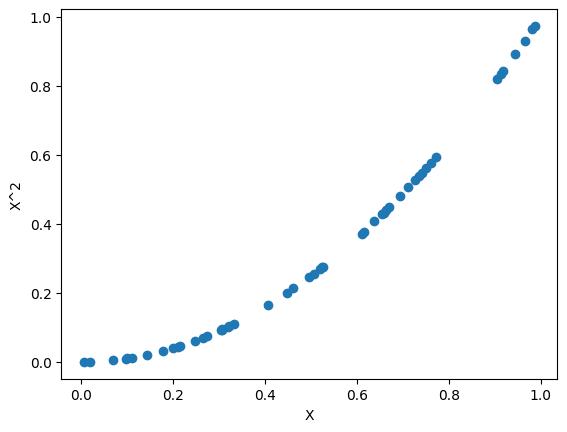

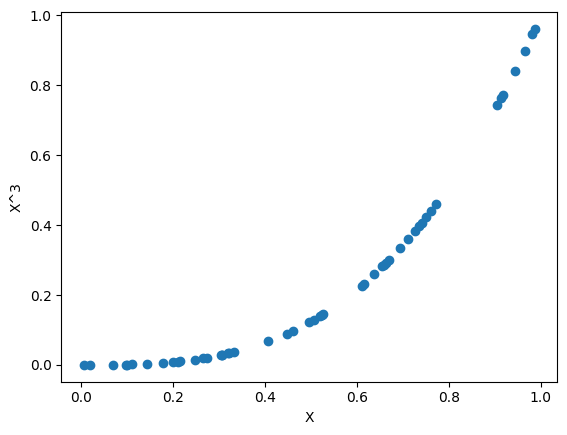

In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(3)
X_poly=poly.fit_transform(X)
display(X_poly.shape) #shape of the generated features

n_features = X_poly.shape[1]

for degree in range(n_features):
    fig=plt.figure()
    plt.scatter(X , X_poly[:,degree])
    plt.xlabel("X")
    plt.ylabel(f"X^{degree}")
    plt.show()

How to use PolynomialFetaures class to train models with different degrees?


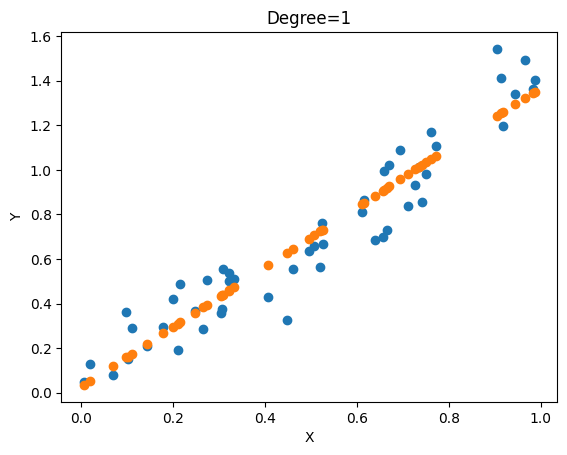

0.909788430105506

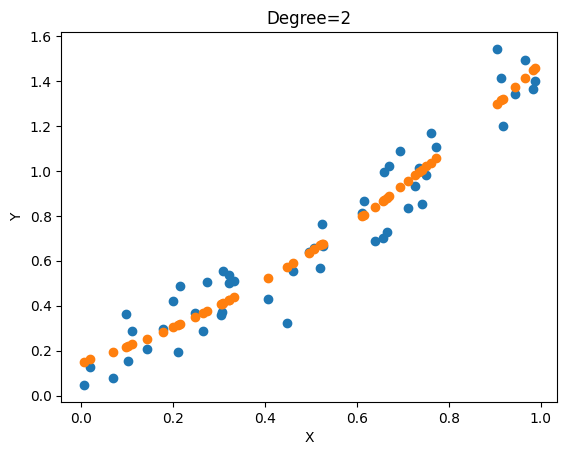

0.926910018937956

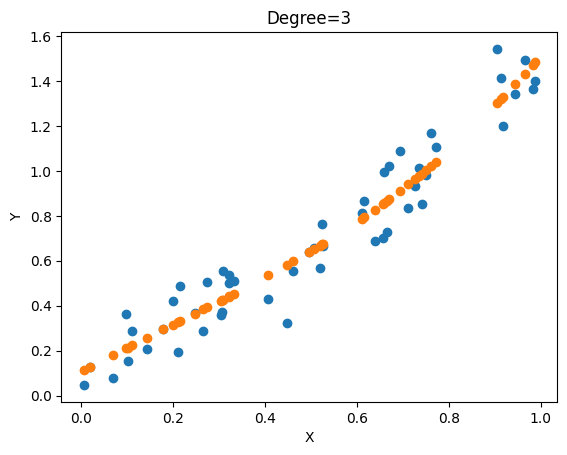

0.9283471500824062

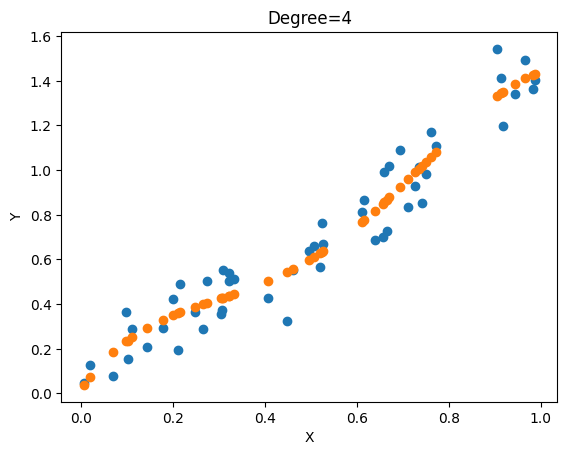

0.9338514708493626

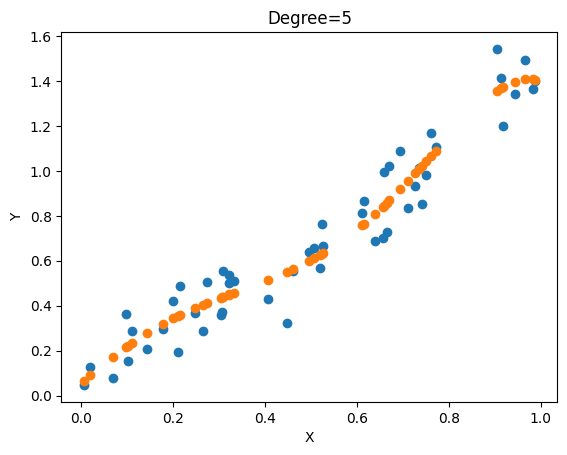

0.9347208316931517

In [9]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler

scores = []

for i in range(1, 6):

    poly= PolynomialFeatures(i)
    X_poly= poly.fit_transform(X)
    scaler = StandardScaler() 
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)
    model= LinearRegression()
    model.fit(X_poly_scaled, y)
    output=model.predict(X_poly_scaled)
    fig = plt.figure()
    plt.scatter (X, y, label="samples")
    plt.scatter(X, output, label= "prediction")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Degree={i}")
    plt.show()
    display (model.score (X_poly_scaled, y))
    scores.append(model.score (X_poly_scaled, y))


There are 50 points in the data , what is the highest  degree which should try ?

In [13]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

degree=50  #number of data-points
scores = []

for i in range(0, degree):
    poly= PolynomialFeatures(i)
    X_poly= poly.fit_transform(X)
    scaler = StandardScaler() 
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)
    model= LinearRegression()
    model.fit(X_poly_scaled, y)
    output=model.predict(X_poly_scaled)
    scores.append(model.score (X_poly_scaled, y))

max_idx=np.argmax(scores)
print(max_idx , scores[max_idx])


38 0.9639809402254291


How does it performs with polynomial of degree 31?

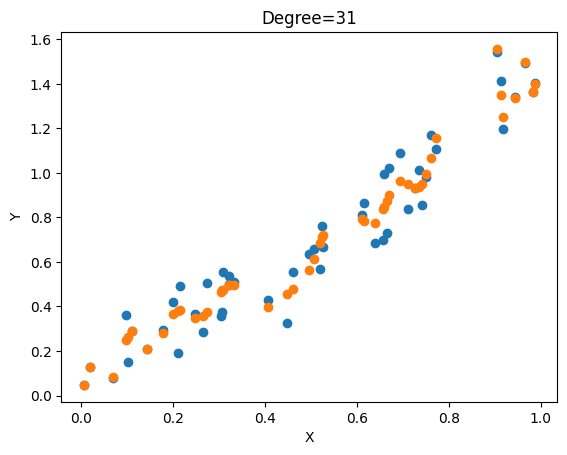

0.9578107172344863

In [14]:
degree=31
poly= PolynomialFeatures(degree)
X_poly= poly.fit_transform(X)
scaler = StandardScaler() 
scaler.fit(X_poly)
X_poly_scaled = scaler.transform(X_poly)
model= LinearRegression()
model.fit(X_poly_scaled, y)
output=model.predict(X_poly_scaled)
fig = plt.figure()
plt.scatter (X, y, label="samples")
plt.scatter(X, output, label= "prediction")
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Degree={degree}")
plt.show()
display (model.score (X_poly_scaled, y))
scores.append(model.score (X_poly_scaled, y))
